In [1]:
### ProblemStatement: Wheather the person is vacccinated or not
### Here in the problemStatement the dependent variable is categorical so we do classification

In [2]:
### Step1:
### Import the packages like numpy,pandas,matplotlib,seaborn,sklearn,train test split,metrics

In [3]:
### Ste2:Load the dataset

In [4]:
### Step3:Explore the data,shape,visulization

In [5]:
### Step4:x,y--->train data test data->Fit the model with the training data and predict with the test data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv("h1n1_vaccine_prediction (3) (1).csv")
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [8]:
df.shape

(26707, 34)

In [9]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

<Axes: xlabel='sex', ylabel='count'>

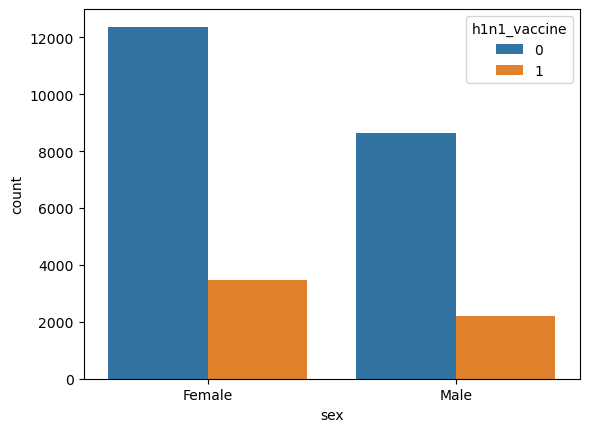

In [10]:
sns.countplot(x="sex",hue="h1n1_vaccine",data=df)

<Axes: xlabel='no_of_adults', ylabel='count'>

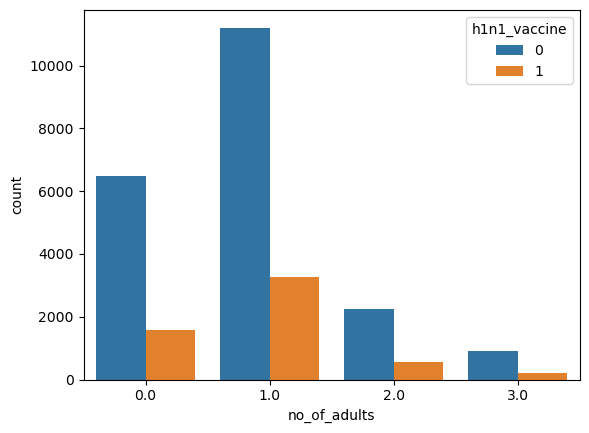

In [11]:
sns.countplot(x="no_of_adults",hue="h1n1_vaccine",data=df)

In [12]:
correlation_mat=df.corr()

<Axes: >

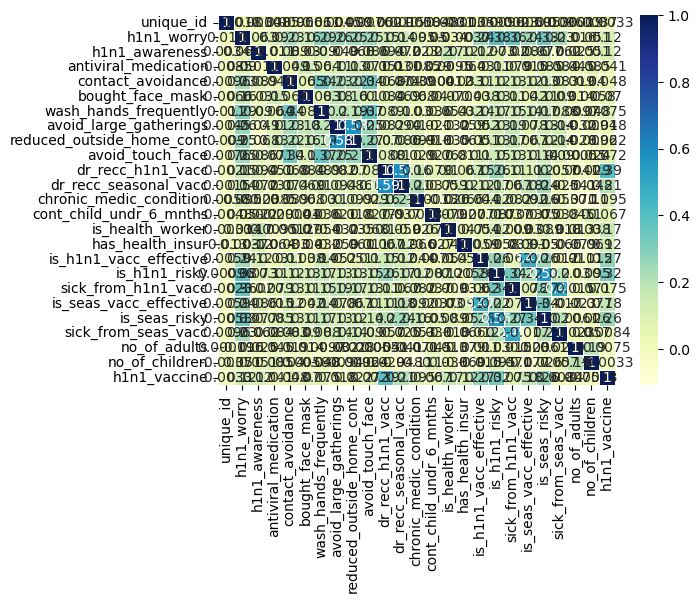

In [13]:
sns.heatmap(correlation_mat,annot=True,linewidth=.5,cmap="YlGnBu")

In [14]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [16]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<Axes: >

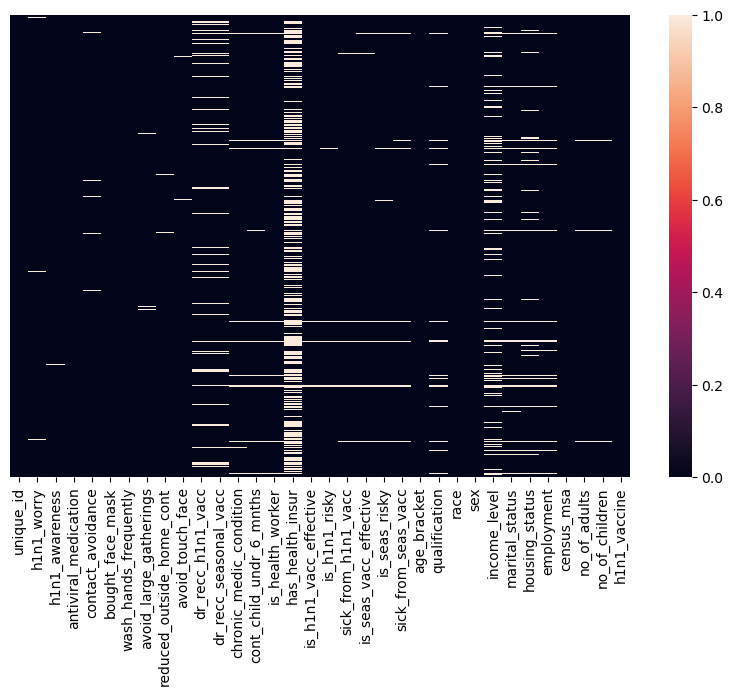

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

In [18]:
print(df["h1n1_worry"].value_counts())
print(df["h1n1_awareness"].value_counts())
print(df["antiviral_medication"].value_counts())
print(df["contact_avoidance"].value_counts())
print(df["bought_face_mask"].value_counts())
print(df["wash_hands_frequently"].value_counts())
print(df["avoid_large_gatherings"].value_counts())
print(df["reduced_outside_home_cont"].value_counts())
print(df["avoid_touch_face"].value_counts())
print(df["dr_recc_h1n1_vacc"].value_counts())
print(df["dr_recc_seasonal_vacc"].value_counts())
print(df["chronic_medic_condition"].value_counts())
print(df["cont_child_undr_6_mnths"].value_counts())
print(df["is_health_worker"].value_counts())
print(df["has_health_insur"].value_counts())
print(df["is_h1n1_vacc_effective"].value_counts())
print(df["is_h1n1_risky"].value_counts())
print(df["sick_from_h1n1_vacc"].value_counts())
print(df["is_seas_risky"].value_counts())
print(df["sick_from_seas_vacc"].value_counts())
print(df["qualification"].value_counts())
print(df["income_level"].value_counts())
print(df["marital_status"].value_counts())
print(df["housing_status"].value_counts())
print(df["employment"].value_counts())
print(df["no_of_adults"].value_counts())
print(df["no_of_children"].value_counts())

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64
1.0    14598
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64
0.0    25335
1.0     1301
Name: antiviral_medication, dtype: int64
1.0    19228
0.0     7271
Name: contact_avoidance, dtype: int64
0.0    24847
1.0     1841
Name: bought_face_mask, dtype: int64
1.0    22015
0.0     4650
Name: wash_hands_frequently, dtype: int64
0.0    17073
1.0     9547
Name: avoid_large_gatherings, dtype: int64
0.0    17644
1.0     8981
Name: reduced_outside_home_cont, dtype: int64
1.0    18001
0.0     8578
Name: avoid_touch_face, dtype: int64
0.0    19139
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64
0.0    16453
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64
0.0    18446
1.0     7290
Name: chronic_medic_condition, dtype: int64
0.0    23749
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64
0.0    23004
1.0     2899
Name: is_health_worker, dtype: int64
1.0    12697
0.0     1736
Name: has_health

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

<Axes: >

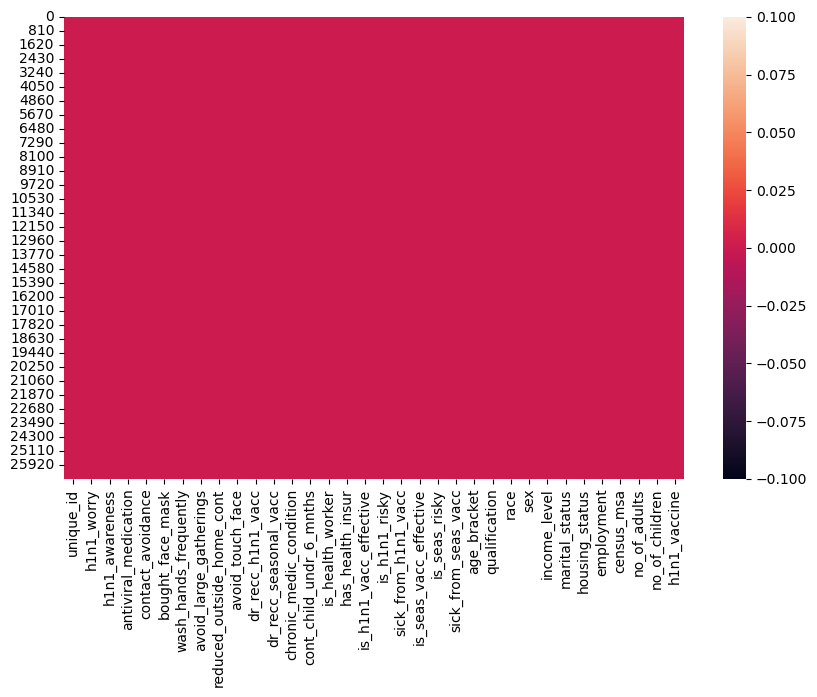

In [19]:

df["h1n1_worry"].fillna(df["h1n1_worry"].mode()[0],inplace=True)
df["h1n1_awareness"].fillna(df["h1n1_awareness"].mode()[0],inplace=True)
df["antiviral_medication"].fillna(df["antiviral_medication"].mode()[0],inplace=True)
df["contact_avoidance"].fillna(df["contact_avoidance"].mode()[0],inplace=True)
df["bought_face_mask"].fillna(df["bought_face_mask"].mode()[0],inplace=True)
df["wash_hands_frequently"].fillna(df["wash_hands_frequently"].mode()[0],inplace=True)
df["avoid_large_gatherings"].fillna(df["avoid_large_gatherings"].mode()[0],inplace=True)
df["reduced_outside_home_cont"].fillna(df["reduced_outside_home_cont"].mode()[0],inplace=True)
df["avoid_touch_face"].fillna(df["avoid_touch_face"].mode()[0],inplace=True)
df["dr_recc_h1n1_vacc"].fillna(df["dr_recc_h1n1_vacc"].mode()[0],inplace=True)
df["dr_recc_seasonal_vacc"].fillna(df["dr_recc_seasonal_vacc"].mode()[0],inplace=True)
df["chronic_medic_condition"].fillna(df["chronic_medic_condition"].mode()[0],inplace=True)
df["cont_child_undr_6_mnths"].fillna(df["cont_child_undr_6_mnths"].mode()[0],inplace=True)
df["is_health_worker"].fillna(df["is_health_worker"].mode()[0],inplace=True)
df["has_health_insur"].fillna(df["has_health_insur"].mode()[0],inplace=True)
df["is_h1n1_vacc_effective"].fillna(df["is_h1n1_vacc_effective"].mode()[0],inplace=True)
df["is_h1n1_risky"].fillna(df["is_h1n1_risky"].mode()[0],inplace=True)
df["sick_from_h1n1_vacc"].fillna(df["sick_from_h1n1_vacc"].mode()[0],inplace=True)
df["is_seas_risky"].fillna(df["is_seas_risky"].mode()[0],inplace=True)
df["sick_from_seas_vacc"].fillna(df["sick_from_seas_vacc"].mode()[0],inplace=True)
df["qualification"].fillna(df["qualification"].mode()[0],inplace=True)
df["income_level"].fillna(df["income_level"].mode()[0],inplace=True)
df["marital_status"].fillna(df["marital_status"].mode()[0],inplace=True)
df["housing_status"].fillna(df["housing_status"].mode()[0],inplace=True)
df["employment"].fillna(df["employment"].mode()[0],inplace=True)
df["no_of_adults"].fillna(df["no_of_adults"].mode()[0],inplace=True)
df["no_of_children"].fillna(df["no_of_children"].mode()[0],inplace=True)
df["is_seas_vacc_effective"].fillna(df["is_seas_vacc_effective"].mode()[0],inplace=True)


print(df.isnull().sum())
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [20]:
df.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [21]:
df["h1n1_worry"]=le.fit_transform(df["h1n1_worry"])
df["h1n1_awareness"]=le.fit_transform(df["h1n1_awareness"])
df["antiviral_medication"]=le.fit_transform(df["antiviral_medication"])
df["contact_avoidance"]=le.fit_transform(df["contact_avoidance"])
df["bought_face_mask"]=le.fit_transform(df["bought_face_mask"])
df["wash_hands_frequently"]=le.fit_transform(df["wash_hands_frequently"])
df["avoid_large_gatherings"]=le.fit_transform(df["avoid_large_gatherings"])
df["reduced_outside_home_cont"]=le.fit_transform(df["reduced_outside_home_cont"])
df["avoid_touch_face"]=le.fit_transform(df["avoid_touch_face"])
df["dr_recc_h1n1_vacc"]=le.fit_transform(df["dr_recc_h1n1_vacc"])
df["dr_recc_seasonal_vacc"]=le.fit_transform(df["dr_recc_seasonal_vacc"])
df["chronic_medic_condition"]=le.fit_transform(df["chronic_medic_condition"])
df["cont_child_undr_6_mnths"]=le.fit_transform(df["cont_child_undr_6_mnths"])
df["is_health_worker"]=le.fit_transform(df["is_health_worker"])
df["has_health_insur"]=le.fit_transform(df["has_health_insur"])
df["is_h1n1_vacc_effective"]=le.fit_transform(df["is_h1n1_vacc_effective"])
df["is_h1n1_risky"]=le.fit_transform(df["is_h1n1_risky"])
df["sick_from_h1n1_vacc"]=le.fit_transform(df["sick_from_h1n1_vacc"])
df["is_seas_risky"]=le.fit_transform(df["is_seas_risky"])
df["sick_from_seas_vacc"]=le.fit_transform(df["sick_from_seas_vacc"])
df["qualification"]=le.fit_transform(df["qualification"])
df["income_level"]=le.fit_transform(df["income_level"])
df["marital_status"]=le.fit_transform(df["marital_status"])
df["housing_status"]=le.fit_transform(df["housing_status"])
df["employment"]=le.fit_transform(df["employment"])
df["no_of_adults"]=le.fit_transform(df["no_of_adults"])
df["no_of_children"]=le.fit_transform(df["no_of_children"])

df.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1,0,0,0,0,0,0,1,1,...,White,Female,2,1,0,1,Non-MSA,0,0,0
1,1,3,2,0,1,0,1,0,1,1,...,White,Male,2,1,1,0,"MSA, Not Principle City",0,0,0
2,2,1,1,0,1,0,0,0,0,0,...,White,Male,0,1,0,0,"MSA, Not Principle City",2,0,0
3,3,1,1,0,1,0,1,1,0,0,...,White,Female,2,1,1,1,"MSA, Principle City",0,0,0
4,4,2,1,0,1,0,1,1,0,1,...,White,Female,0,0,0,0,"MSA, Not Principle City",1,0,0


In [22]:
df=df.drop(columns=["unique_id","bought_face_mask","sex","income_level","marital_status","housing_status","employment"],axis=1)

In [23]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,...,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1,0,0,0,0,0,1,1,0,0,...,2.0,0,1,55 - 64 Years,1,White,Non-MSA,0,0,0
1,3,2,0,1,1,0,1,1,0,0,...,4.0,1,3,35 - 44 Years,0,White,"MSA, Not Principle City",0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,4.0,0,1,18 - 34 Years,2,White,"MSA, Not Principle City",2,0,0
3,1,1,0,1,1,1,0,0,0,1,...,5.0,3,0,65+ Years,0,White,"MSA, Principle City",0,0,0
4,2,1,0,1,1,1,0,1,0,0,...,3.0,0,3,45 - 54 Years,3,White,"MSA, Not Principle City",1,0,0


In [24]:
df=df.drop(columns=["avoid_large_gatherings","age_bracket","qualification","race","census_msa"],axis=1)

In [25]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,wash_hands_frequently,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
0,1,0,0,0,0,1,1,0,0,0,...,1,2,0,1,2.0,0,1,0,0,0
1,3,2,0,1,1,1,1,0,0,0,...,1,4,3,3,4.0,1,3,0,0,0
2,1,1,0,1,0,0,0,0,0,1,...,1,2,0,0,4.0,0,1,2,0,0
3,1,1,0,1,1,0,0,0,1,1,...,1,2,2,4,5.0,3,0,0,0,0
4,2,1,0,1,1,0,1,0,0,0,...,1,2,2,1,3.0,0,3,1,0,0


In [26]:
x=df.drop("h1n1_vaccine",axis=1)
y=df["h1n1_vaccine"]

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [28]:
model_1=LogisticRegression(solver="liblinear")

In [29]:
model_1.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [30]:
model_1.score(x_train,y_train)

0.8343853642880068

In [31]:
model_1.score(x_test,y_test)

0.8297766130038687

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model_2=DecisionTreeClassifier(criterion="gini")
model_2.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
model_2.score(x_train,y_train)

0.9924039798865947

In [35]:
model_2.score(x_test,y_test)

0.7547734930737552

In [36]:
model_2=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=0)
model_2.fit(x_train,y_train)
print(model_2.score(x_train,y_train))

0.827538247566064


In [37]:
y_predict=model_2.predict(x_test)

In [38]:
print(model_2.score(x_test,y_test))

0.823786347185823


In [39]:
from sklearn import metrics

<Axes: >

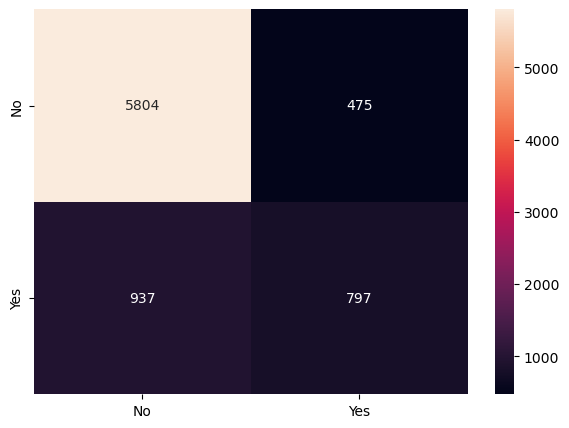

In [40]:
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])

df_cm=pd.DataFrame(cm,index=[i for i in ["No","Yes"]],
                  columns=[i for i in ["No","Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [41]:
from sklearn.ensemble import AdaBoostClassifier
abcl=AdaBoostClassifier(n_estimators=120,random_state=0)
abcl=abcl.fit(x_train,y_train)
y_predict=abcl.predict(x_test)
print(abcl.score(x_test,y_test))

0.8311493822538375


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl=GradientBoostingClassifier(n_estimators=200,random_state=0)
gbcl=gbcl.fit(x_train,y_train)
y_predict=gbcl.predict(x_test)
print(gbcl.score(x_test,y_test))

0.8361412704355422


In [43]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=160,random_state=0,max_features=3)
rfcl=rfcl.fit(x_train,y_train)
y_predict=rfcl.predict(x_test)
print(rfcl.score(x_test,y_test))

0.8275302633221016


In [44]:
from sklearn.svm import SVC

In [45]:
model_5=SVC()
model_5.fit(x_train,y_train)

SVC()

In [46]:
model_5.score(x_train,y_train)

0.8362576227666632

In [47]:
model_5.score(x_test,y_test)

0.8315237738674653

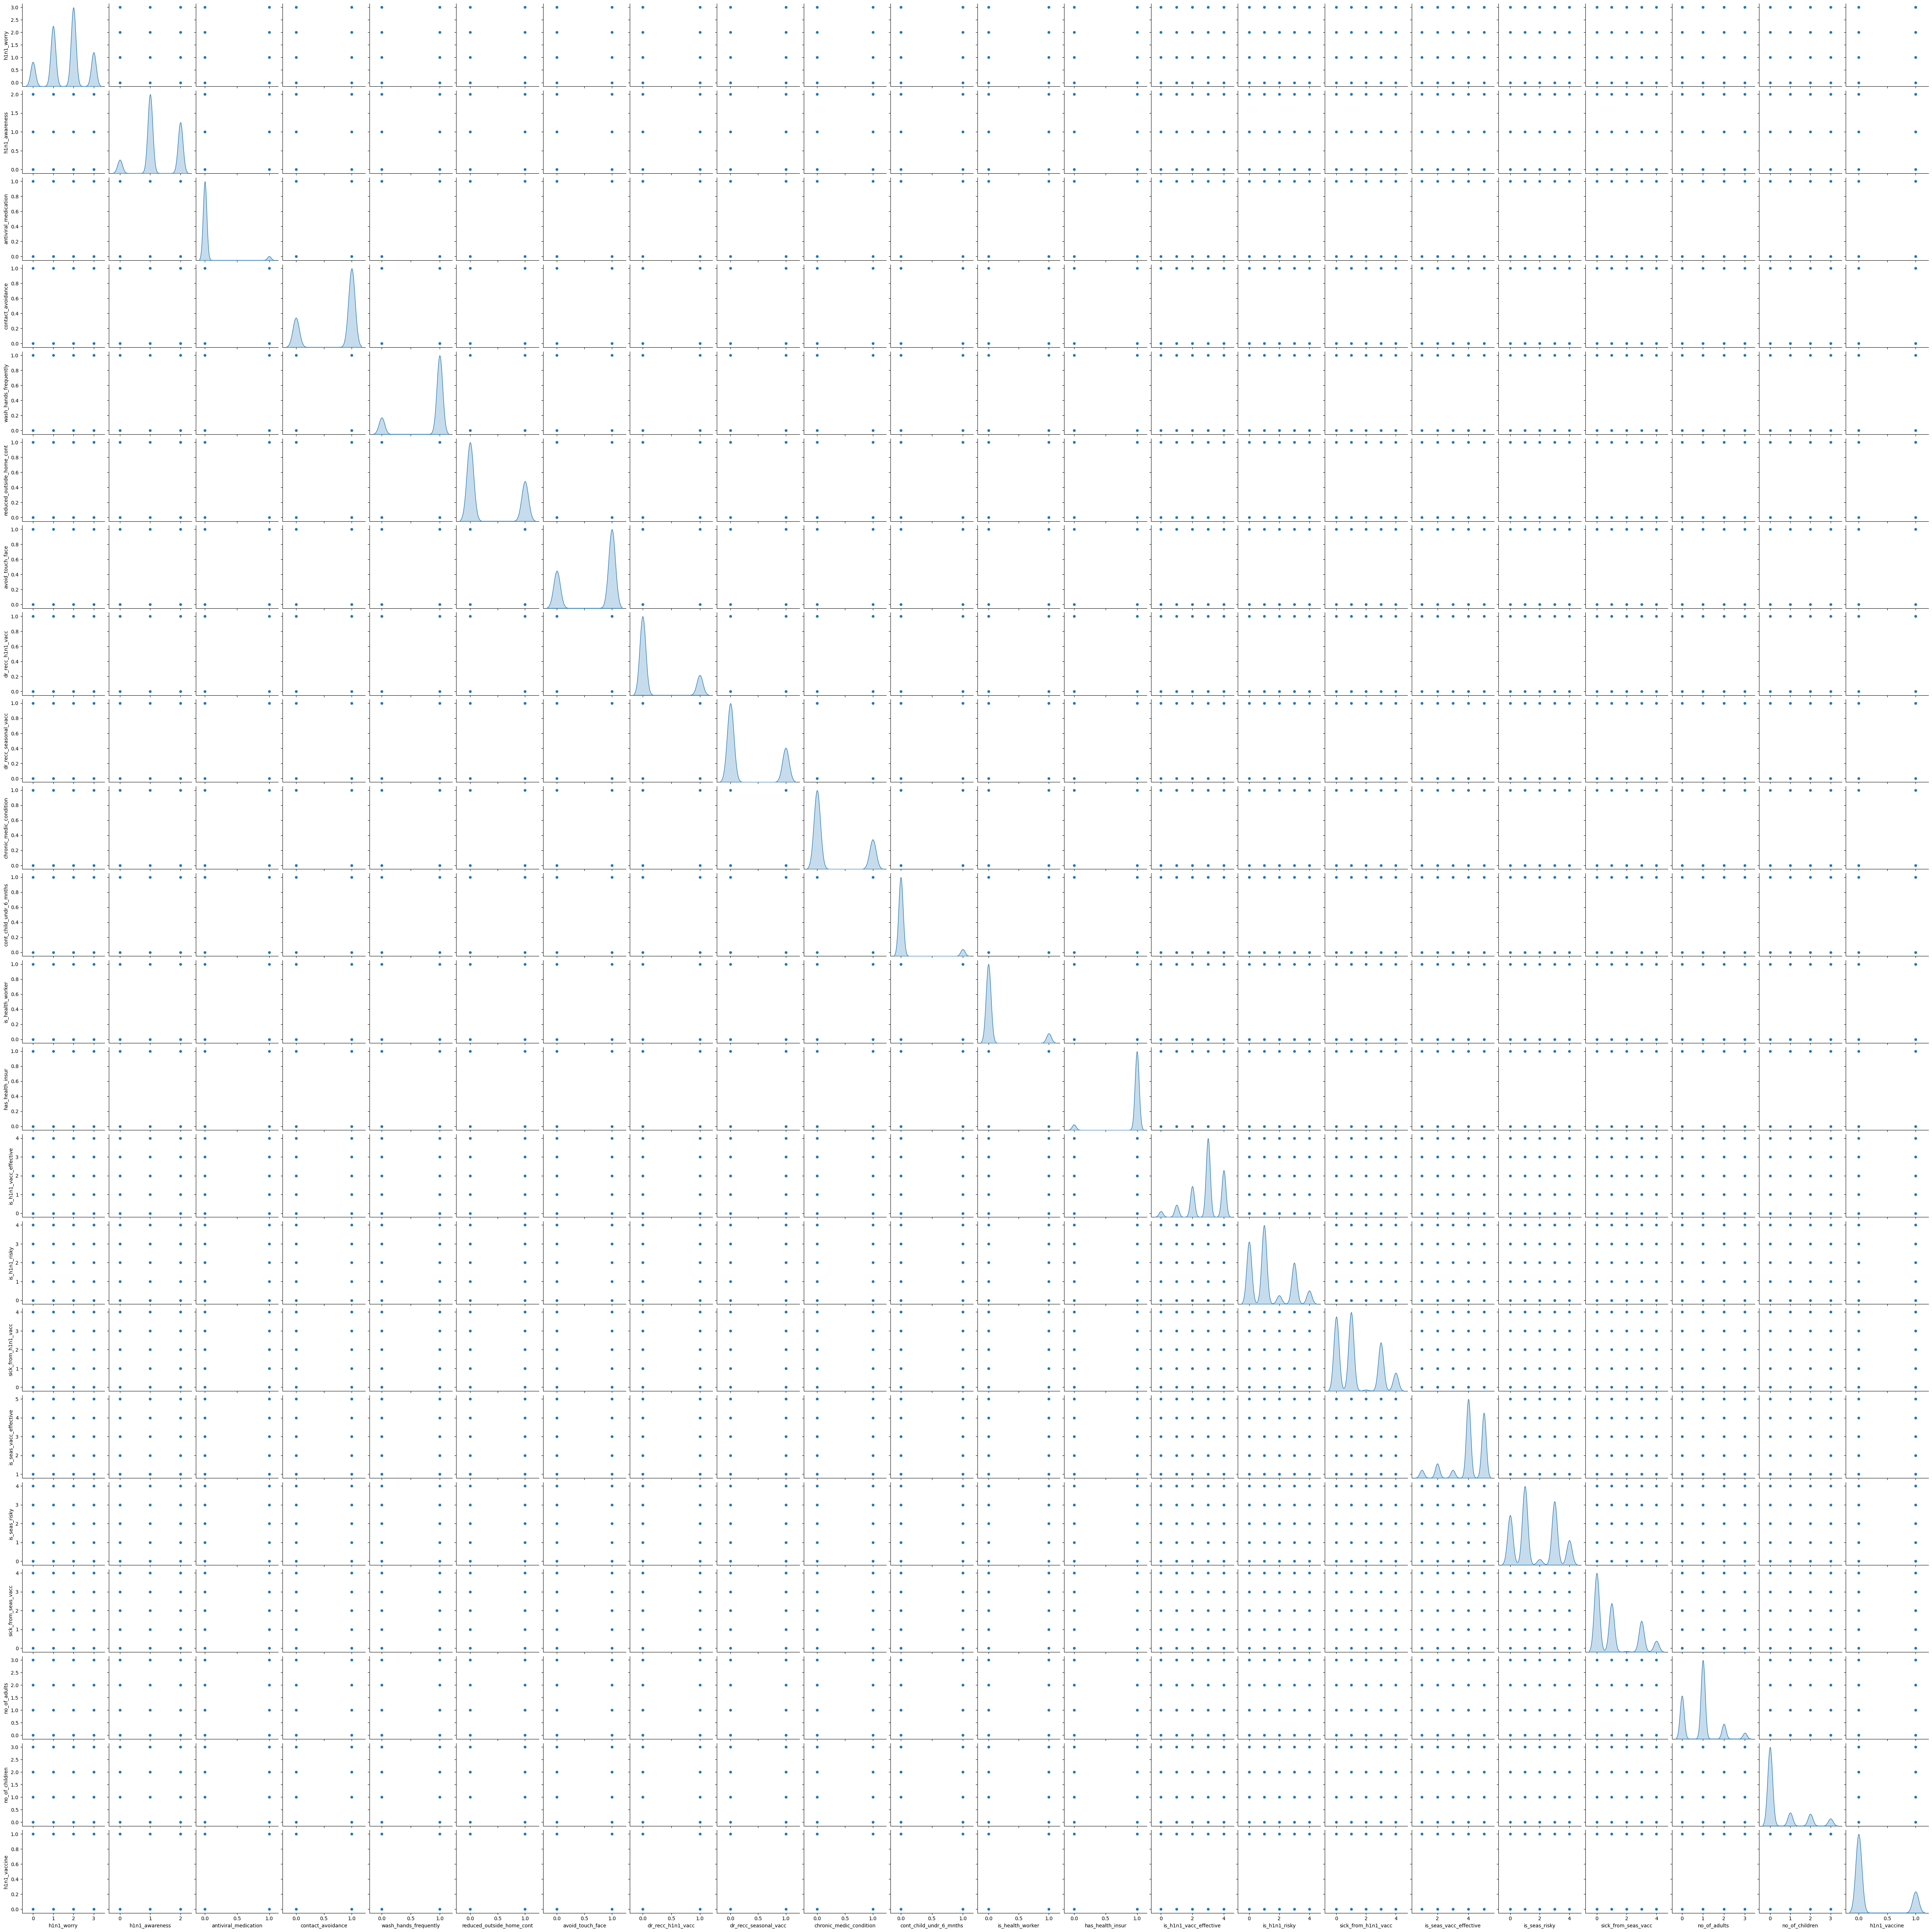

In [48]:
sns.pairplot(df,diag_kind='kde')

<Axes: xlabel='no_of_adults', ylabel='h1n1_vaccine'>

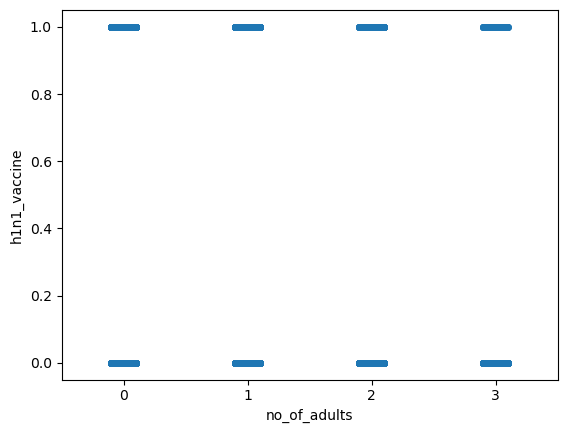

In [49]:
sns.stripplot(x="no_of_adults",y="h1n1_vaccine",data=df)

<Axes: >

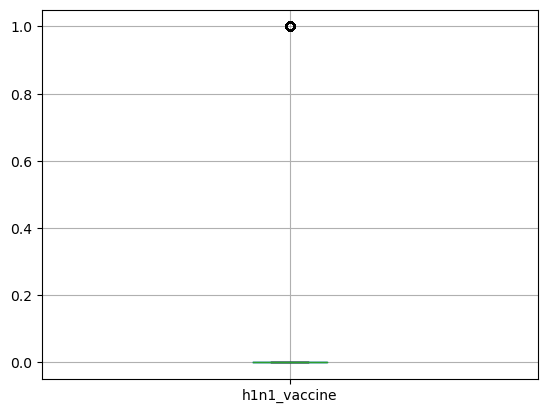

In [50]:
df.boxplot(column="h1n1_vaccine")

In [51]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [52]:
low,upp=remove_outlier(df['h1n1_vaccine'])
df['h1n1_vaccine']=np.where(df['h1n1_vaccine']>upp,upp,df['h1n1_vaccine'])
df['h1n1_vaccine']=np.where(df['h1n1_vaccine']<low,low,df['h1n1_vaccine'])

<Axes: >

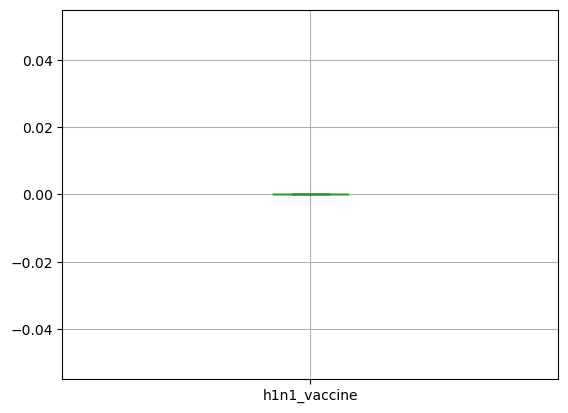

In [53]:
df.boxplot(column="h1n1_vaccine")